## Comenzamos cargando las librerias necesarias para el proyecto

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Vamos a trabajar con el archivo que contiene informacion sobre internet.

* Cargamos el archivo.
* Visualizamos las hojas.
* Extraemos informacion del diccionario de datos para determinar cuales hojas vamos a utilizar.

In [3]:
data = pd.ExcelFile('Data/Internet.xlsx')
data.sheet_names

['Totales Accesos Por Tecnología_',
 'Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [5]:
df_ingresos = pd.read_excel('Data/Internet.xlsx', sheet_name='Ingresos ')

df_totales_velocidad = pd.read_excel('Data/Internet.xlsx', sheet_name='Totales Accesos por velocidad')
df_penetracion_hogares = pd.read_excel('Data/Internet.xlsx', sheet_name='Penetracion-hogares')

## EDA de la hoja Ingresos

In [45]:
df_ingresos = data.parse('Ingresos ')


## Analizando valores:

* Valores nulos
* Ceros 
* Tipos de datos
* Duplicados

In [46]:
df_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [47]:
(df_ingresos == 0).sum()


Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [48]:
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


In [49]:
df_ingresos.dtypes


Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object

In [50]:
df_ingresos['Año'] = pd.to_datetime(df_ingresos['Año'],format='%Y')

In [51]:
df_ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024-01-01,1,2.804191e+08,Ene-Mar 2024
1,2023-01-01,4,1.673760e+08,Oct-Dic 2023
2,2023-01-01,3,1.331066e+08,Jul-Sept 2023
3,2023-01-01,2,1.180603e+08,Jun-Mar 2023
4,2023-01-01,1,1.041350e+08,Ene-Mar 2023
5,2022-01-01,4,7.244348e+07,Oct-Dic 2022
6,2022-01-01,3,6.408678e+07,Jul-Sept 2022
7,2022-01-01,2,6.041950e+07,Abr-Jun 2022
8,2022-01-01,1,5.521931e+07,Ene-Mar 2022
9,2021-01-01,4,4.546789e+07,Oct-Dic 2021


In [52]:
duplicados = df_ingresos[df_ingresos.duplicated()]
duplicados

,Año,Trimestre,Ingresos (miles de pesos),Periodo


## Graficos

* Evolucion de los ingresos a traves de los años
* Boxplot para detectar outliers
* Histograma

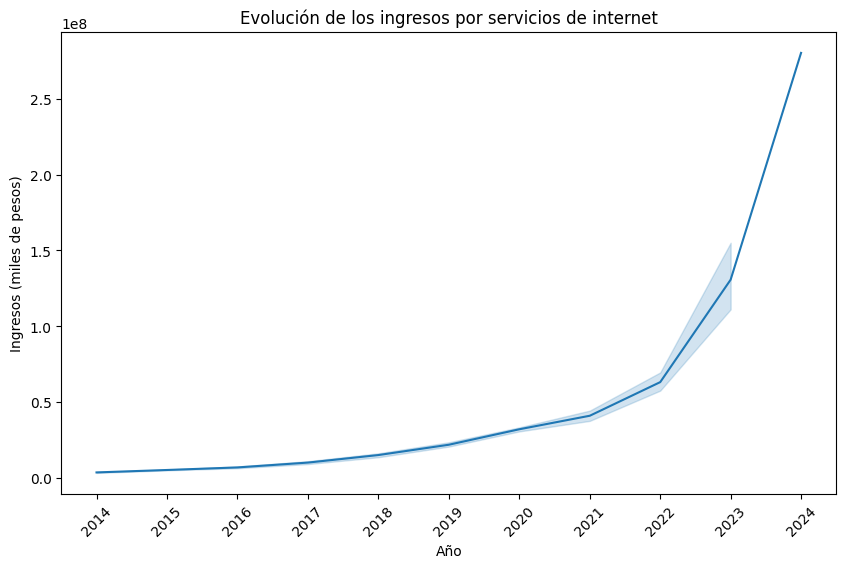

In [53]:
# Gráfico de la evolución de los ingresos
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Evolución de los ingresos por servicios de internet')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Ingresos (miles de pesos)'>

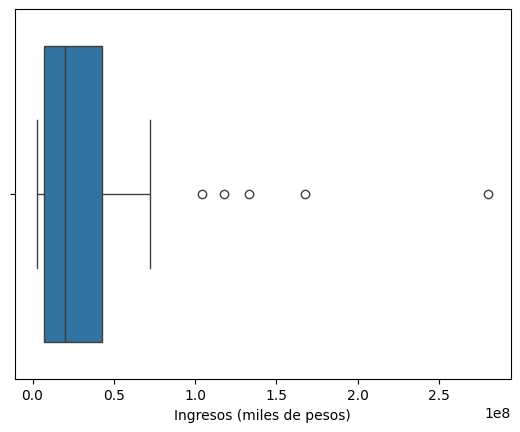

In [54]:
# Boxplot
sns.boxplot(x=df_ingresos['Ingresos (miles de pesos)'])


<Axes: xlabel='Ingresos (miles de pesos)', ylabel='Count'>

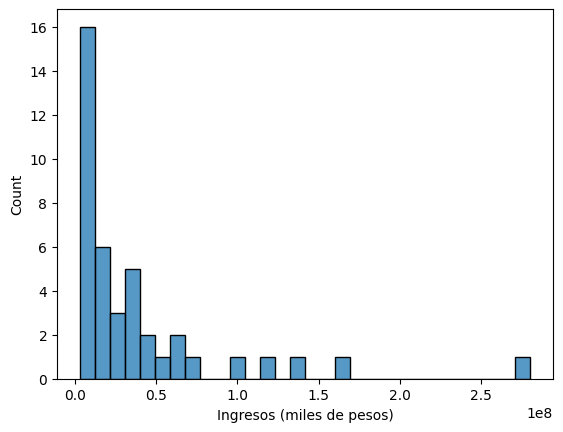

In [55]:
# Histograma
sns.histplot(df_ingresos['Ingresos (miles de pesos)'], bins=30)


In [57]:
correlation_matrix = df_ingresos.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


ValueError: could not convert string to float: 'Ene-Mar 2024'

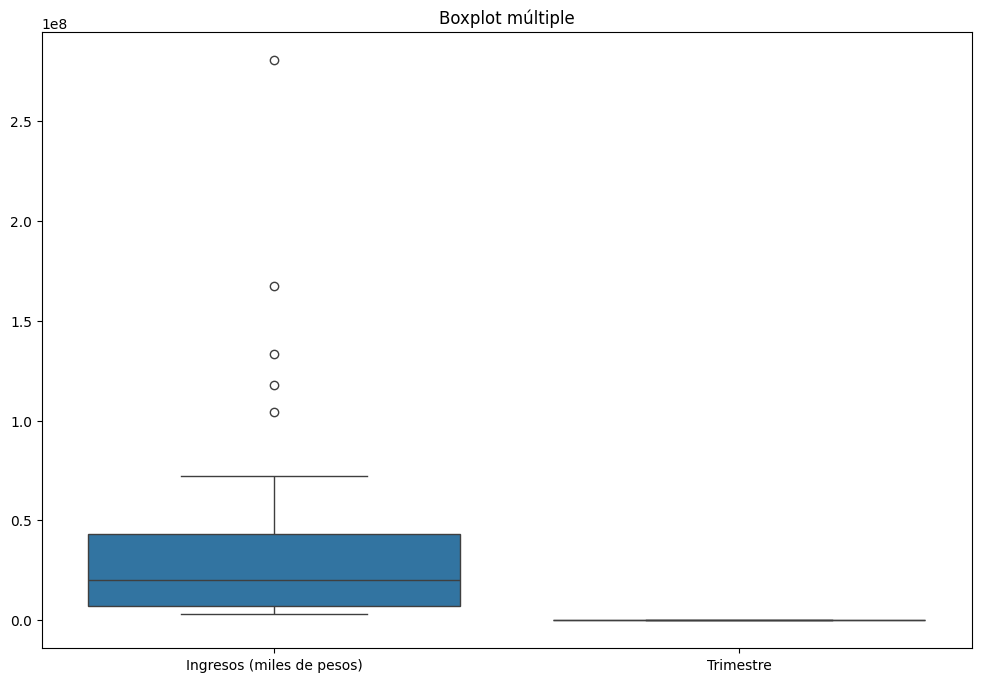

In [33]:
# Crear un boxplot para varias columnas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ingresos[['Ingresos (miles de pesos)', 'Año', 'Trimestre']])
plt.title('Boxplot múltiple')
plt.show()


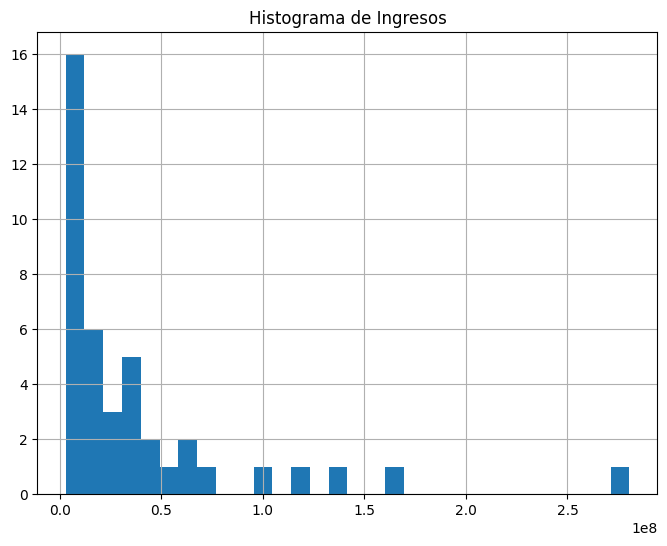

In [40]:
# Crear un histograma de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
df_ingresos['Ingresos (miles de pesos)'].hist(bins=30)
plt.title('Histograma de Ingresos')
plt.show()


In [ ]:
df_penetracion_hogares = pd.read_excel('Data/Internet.xlsx', sheet_name='Penetracion-hogares')

In [61]:
df_penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.100000
1,2024,1,Capital Federal,119.530000
2,2024,1,Catamarca,68.820000
3,2024,1,Chaco,46.700000
4,2024,1,Chubut,84.890000
...,...,...,...,...
979,2014,1,Santa Cruz,28.939093
980,2014,1,Santa Fe,47.847663
981,2014,1,Santiago Del Estero,16.309924
982,2014,1,Tierra Del Fuego,63.965926


In [6]:
df_ingresos.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

In [7]:
df_penetracion_hogares.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')